# <center><font color='GREEN'>CAPSTONE PROJECT</font></center>
<center><font color='LIGHT GREEN'>PURPLE TEAM</font></center>
<leftside><font color='pink'><font color='red'>Team Members</font></font> :</leftside>

 
       1.ROY PARTHA PROTIM 
    
       2.KOTESH ALUGUBELLY
    
       3.CHOWDAIAH NAIDU THIMMISETTY

   <side>Proffesor :     Venkatesh Uddameri</side>

# 1.0 Problem Statement



Calculating the failure probability of a given nonlinear performance functions using Monte-Carlo Simulation

 - Monte-Carlo simulation is a method used to predict the probability of various outcomes by using random variables
 - Normally the random values are taken from a dataset that has a specific standard deviation and mean values

# 2.0 Governing Equation

## 2.1 Failure Probability Funtion

The general failure probability fucntion can be expressed as follows:



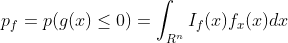

 - This equation tells us that whenever the value of this function will be less than zero


## 2.2 Example 4

The nonlinear performance functions of the given reliability problem is:

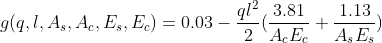


 - Q,L,As,Ac,Es,Ec are the vectors that denotes basic input variables
 - the properties of the data set is given below:



| Variables | Standard Deviation | Mean |
| --- | --- | --- |
| Q | 1400| 20000|
| L | 0.12| 12 |
|AS |0.00005982|0.000982|
|AC |0.0048|0.04|
|ES |6000000000|100000000000|
|EC|1200000000|20000000000|


# 3.0 Code

# 3.1 Importing libraries and generating random numbers

In [4]:
import numpy as np
import scipy.stats as st

Nsim =1060000
Q= st.norm.rvs(loc=20000,scale=1400,size=Nsim)
L= st.norm.rvs(loc=12,scale=0.12,size=Nsim)
As= st.norm.rvs(loc=0.000982,scale=0.00005982,size=Nsim)
Ac= st.norm.rvs(loc=0.04,scale=0.0048,size=Nsim)
Es= st.norm.rvs(loc=100000000000,scale=6000000000,size=Nsim)
Ec= st.norm.rvs(loc=20000000000,scale=1200000000,size=Nsim)


print ('Values of Q:', Q)
print ('Values of L:', L)
print ('Values of As:', As)
print ('Values of Ac:', Ac)
print ('Values of Es:', Es)
print ('Values of Ec:', Ec)

Values of Q: [20314.66491511 20030.7230557  20019.69061458 ... 21603.0748259
 19716.52912265 18894.72222043]
Values of L: [12.15917684 11.93622948 12.07466629 ... 11.9367799  11.8612576
 11.81940865]
Values of As: [0.00090095 0.00096942 0.00100766 ... 0.00090655 0.00099175 0.00098415]
Values of Ac: [0.04112122 0.03620301 0.03692711 ... 0.03278283 0.03827955 0.05289423]
Values of Es: [1.15348133e+11 9.07420851e+10 9.72543532e+10 ... 9.85834709e+10
 9.40598723e+10 9.36267074e+10]
Values of Ec: [1.99587881e+10 1.86140970e+10 2.04274513e+10 ... 1.89214324e+10
 1.84967620e+10 1.98351786e+10]


## 3.2 Defining the function and looking at the results

In [5]:
DeltaC= lambda Q,L,As,Ac,Es,Ec : 0.03 - (Q*(0.5)*(L**2)*((3.81/(Ac*Ec))+(1.13/(As*Es))))

idx= np.arange(0,Nsim,1)
res=[]

for J in idx:
    TT=DeltaC(Q[J],L[J],As[J],Ac[J],Es[J],Ec[J])
    res.append(TT)
res

[0.00669988814101577,
 0.0036026111332770026,
 0.0058007342438998605,
 0.00415029406111839,
 0.004919801893124472,
 0.004842823083409033,
 0.006323288881817973,
 0.004254965950637495,
 0.005478248355748703,
 0.00495969193388511,
 0.008663852214641266,
 0.007152769613590057,
 0.005653090185397516,
 0.004220972578118168,
 0.011742537588385598,
 0.007236172961769816,
 0.007262226607339207,
 0.0008008129360302096,
 0.008419593903241186,
 0.0041866785644704835,
 0.002893570597461533,
 0.007010437345164634,
 0.007958058559414036,
 0.005882650909443319,
 0.008529250616735332,
 0.006977022374783259,
 0.005905067284249582,
 0.007297716427436353,
 0.0034274763939250094,
 0.0032847935450053822,
 0.004929708278602302,
 0.003999292240091611,
 0.005133198312386681,
 0.010225619765253345,
 0.006658663513529249,
 0.0027946184239302403,
 0.00869153153077424,
 0.007695246399258757,
 0.006333974047440315,
 0.004534048885812065,
 0.010067111362639367,
 0.00921035144194857,
 0.00260288536775527,
 0.0100036

## 3.3 Calculating failure probability

In [6]:
a=list(res)
pos_count,neg_count=0,0

for num in a:
    if num>=0:
        pos_count+=1
    else:
        neg_count+=1
        
print("Negative numbers in the list: ", neg_count)

print("positive numbers in the list: ", pos_count)

pof=neg_count/Nsim

print("Failure probability: ", pof)


Negative numbers in the list:  10148
positive numbers in the list:  1049852
Failure probability:  0.009573584905660378
